In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patches as patches
from collections import Counter
import matplotlib.patheffects as path_effects
import matplotlib.gridspec as gridspec

import matplotlib.cm as cm
import matplotlib.colors as mcolors

from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
import urllib
from urllib.request import urlopen
import os
import shutil
from unidecode import unidecode
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [80]:
df = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL_2023_2024GW01_to_GW38.csv")

In [2]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

In [81]:
def possession_vs_field_tilt(match_ID):
    df_game = df[df['match_id']==match_ID]
    hteamName = df_game['home_team_name'].unique()[0]
    ateamName = df_game['away_team_name'].unique()[0]
    #Possession%
    hpossdf = df_game[(df_game['teamName']==hteamName) & (df_game['type']=='Pass')]
    apossdf = df_game[(df_game['teamName']==ateamName) & (df_game['type']=='Pass')]
    hposs = round((len(hpossdf)/(len(hpossdf)+len(apossdf)))*100,2)
    aposs = round((len(apossdf)/(len(hpossdf)+len(apossdf)))*100,2)
    #Field Tilt%
    hftdf = df_game[(df_game['teamName']==hteamName) & (df_game['isTouch']==1) & (df_game['x']>=70)]
    aftdf = df_game[(df_game['teamName']==ateamName) & (df_game['isTouch']==1) & (df_game['x']>=70)]
    hft = round((len(hftdf)/(len(hftdf)+len(aftdf)))*100,2)
    aft = round((len(aftdf)/(len(hftdf)+len(aftdf)))*100,2)

    return {
        'Team_Name': hteamName,
        'Opponent_Team_Name': ateamName,
        'Team_Possession': hposs,
        'Opponent_Possession': aposs,
        'Team_Field_Tilt': hft,
        'Opponent_Field_Tilt': aft
    }

match_IDs = df['match_id'].unique()
stats_list = []
for match_ID in match_IDs:
    stats = possession_vs_field_tilt(match_ID)
    stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
stats_df

,Team_Name,Opponent_Team_Name,Team_Possession,Opponent_Possession,Team_Field_Tilt,Opponent_Field_Tilt
0,Arsenal,Nottingham Forest,78.00,22.00,83.38,16.62
1,Bournemouth,West Ham,62.27,37.73,61.71,38.29
2,Brentford,Tottenham,31.27,68.73,20.35,79.65
3,Brighton,Luton,70.39,29.61,73.63,26.37
4,Burnley,Man City,34.97,65.03,31.37,68.63
5,Chelsea,Liverpool,64.94,35.06,63.62,36.38
6,Everton,Fulham,41.30,58.70,54.24,45.76
7,Man Utd,Wolves,50.86,49.14,51.71,48.29
8,Newcastle,Aston Villa,52.10,47.90,50.55,49.45
9,Sheff Utd,Crystal Palace,32.42,67.58,36.77,63.23


In [83]:
def top_poss_ft(team_name):
    # Filter rows where either Team_Name or Opponent_Team_Name is team_name
    team_df = stats_df[(stats_df['Team_Name'] == team_name) | (stats_df['Opponent_Team_Name'] == team_name)]

    # Initialize lists to store the filtered data
    team_name_list = []
    opponent_list = []
    possession_list = []
    field_tilt_list = []
    match_type = []

    # Populate the lists with the correct values
    for index, row in team_df.iterrows():
        if row['Team_Name'] == team_name:
            team_name_list.append(row['Team_Name'])
            opponent_list.append(row['Opponent_Team_Name'])
            possession_list.append(row['Team_Possession'])
            field_tilt_list.append(row['Team_Field_Tilt'])
            match_type.append('Home')
        else:
            team_name_list.append(row['Opponent_Team_Name'])
            opponent_list.append(row['Team_Name'])
            possession_list.append(row['Opponent_Possession'])
            field_tilt_list.append(row['Opponent_Field_Tilt'])
            match_type.append('Away')

    # Create the new DataFrame
    team_stats = pd.DataFrame({
        'Team_Name': team_name_list,
        'Opponent': opponent_list,
        'Possession': possession_list,
        'Field_Tilt': field_tilt_list,
        'Match_Type': match_type
    })
    avg_pos = team_stats['Possession'].mean().round(2)
    avg_ft = team_stats['Field_Tilt'].mean().round(2)
    return {'Team_Name': team_name, 'Avg_Possession': avg_pos, 'Avg_Field_Tilt': avg_ft}

teams = df['teamName'].unique()
top_list = []
for team_name in teams:
    top_stats = top_poss_ft(team_name)
    top_list.append(top_stats)

top_df = pd.DataFrame(top_list)
top_df = top_df.sort_values(by='Avg_Possession', ascending=False).reset_index(drop=True)
top_df

,Team_Name,Avg_Possession,Avg_Field_Tilt
0,Man City,65.42,74.07
1,Tottenham,61.62,60.79
2,Liverpool,61.52,64.47
3,Brighton,59.93,57.34
4,Chelsea,58.57,53.76
5,Arsenal,58.26,67.63
6,Aston Villa,53.33,52.05
7,Newcastle,52.02,51.58
8,Fulham,50.70,48.92
9,Man Utd,50.43,48.66


In [89]:
def full_season(ax, team_name):
    # Filter rows where either Team_Name or Opponent_Team_Name is team_name
    team_df = stats_df[(stats_df['Team_Name'] == team_name) | (stats_df['Opponent_Team_Name'] == team_name)]

    # Initialize lists to store the filtered data
    team_name_list = []
    opponent_list = []
    possession_list = []
    field_tilt_list = []
    match_type = []

    # Populate the lists with the correct values
    for index, row in team_df.iterrows():
        if row['Team_Name'] == team_name:
            team_name_list.append(row['Team_Name'])
            opponent_list.append(row['Opponent_Team_Name'])
            possession_list.append(row['Team_Possession'])
            field_tilt_list.append(row['Team_Field_Tilt'])
            match_type.append('Home')
        else:
            team_name_list.append(row['Opponent_Team_Name'])
            opponent_list.append(row['Team_Name'])
            possession_list.append(row['Opponent_Possession'])
            field_tilt_list.append(row['Opponent_Field_Tilt'])
            match_type.append('Away')

    # Create the new DataFrame
    team_stats = pd.DataFrame({
        'Team_Name': team_name_list,
        'Opponent': opponent_list,
        'Possession': possession_list,
        'Field_Tilt': field_tilt_list,
        'Match_Type': match_type
    })
    
    # Calculate rolling average with a window of 3
    team_stats['Possession_Rolling'] = team_stats['Possession'].rolling(window=3, min_periods=1).mean()
    team_stats['Field_Tilt_Rolling'] = team_stats['Field_Tilt'].rolling(window=3, min_periods=1).mean()

    # Plot the rolling averages
    ax.plot(team_stats['Possession_Rolling'], label='Possession Rolling Average', color='#ff7f0e')
    ax.plot(team_stats['Field_Tilt_Rolling'], label='Field Tilt Rolling Average', color='#1f77b4')

    # Fill the area between the two lines
    ax.fill_between(team_stats.index, team_stats['Possession_Rolling'], team_stats['Field_Tilt_Rolling'], 
                 where=(team_stats['Possession_Rolling'] >= team_stats['Field_Tilt_Rolling']), 
                 facecolor='#ff7f0e', alpha=0.5, interpolate=True)
    ax.fill_between(team_stats.index, team_stats['Possession_Rolling'], team_stats['Field_Tilt_Rolling'], 
                 where=(team_stats['Possession_Rolling'] < team_stats['Field_Tilt_Rolling']), 
                 facecolor='#1f77b4', alpha=0.5, interpolate=True)

    # Add labels and title
    ax.set_xticks(ticks=team_stats.index, y=0, color='k', labels=team_stats['Opponent'], rotation=90)
    ax.set_yticks(ticks=[0,10,20,30,40,50,60,70,80,90,100])
    ax.set_xlabel('Opposition Teams', fontsize=15, fontweight='bold')
    ax.set_ylabel('Possession/Field Tilt %', fontsize=15, fontweight='bold')
    # ax.set_xlim(1,38)
    ax.set_ylim(0,100)
    ax.text(0.5, 116, f'{team_name} in EPL 2023-24', fontsize=45, fontweight='bold', ha='left', va='center')
    ax_text(0.5, 108, '<Possession%> and <Field Tilt%> per match | 3 match rolling avg. | made by: @adnaaan433', fontsize=18, ha='left', va='center', 
            highlight_textprops=[{'color': '#ff7f0e'}, {'color': '#1f77b4'}], ax=ax)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, ls = ":", color = "lightgray")

    avg_pos = team_stats['Possession'].mean().round(2)
    avg_ft = team_stats['Field_Tilt'].mean().round(2)
    # ax.text(19, 5, f'Avg. Possession: {avg_pos}    |    Avg. Field Tilt: {avg_ft}', ha='center', va='center', fontsize=20)
    ax.axhline(avg_pos, color='#ff7f0e', ls='--')
    ax.axhline(avg_ft, color='#1f77b4', ls='--')

    if avg_pos > avg_ft:
        ax.text(38, avg_pos+1, f'Avg. Possession: {avg_pos}%', ha='center', va='bottom', rotation=90, color='#ff7f0e', fontsize=12)
        ax.text(38, avg_ft-1, f'Avg. Field Tilt: {avg_ft}%', ha='center', va='top', rotation=90, color='#1f77b4', fontsize=12)
    if avg_ft > avg_pos:
        ax.text(38, avg_ft+1, f'Avg. Field Tilt: {avg_ft}%', ha='center', va='bottom', rotation=90, color='#1f77b4', fontsize=12)
        ax.text(38, avg_pos-1, f'Avg. Possession: {avg_pos}%', ha='center', va='top', rotation=90, color='#ff7f0e', fontsize=12)

    # DC_to_FC = ax.transData.transform
    # FC_to_NFC = fig.transFigure.inverted().transform
    # DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    # ax_coords = DC_to_NFC((-4,108))
    # ax_size = 0.075
    # image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    # fotmob_url = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    # fotmob_url = fotmob_url.replace(' ', '%20')
    # club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    # image_ax.imshow(club_icon)
    # image_ax.axis('off')

    # i = 0
    # for team_names in team_stats['Opponent']:
    #     DC_to_FC = ax.transData.transform
    #     FC_to_NFC = fig.transFigure.inverted().transform
    #     DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    #     ax_coords = DC_to_NFC((i-0.65,-5))
    #     ax_size = 0.025
    #     image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    #     fotmob_url = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_names}.html'
    #     fotmob_url = fotmob_url.replace(' ', '%20')
    #     club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    #     image_ax.imshow(club_icon)
    #     image_ax.axis('off')
    #     i += 1
    
    return

# fig,ax=plt.subplots(figsize=(20,10), facecolor='#EFE9E6')
# full_season(ax, team_name)

In [71]:
def home_matches(ax, team_name):
    # Filter rows where either Team_Name or Opponent_Team_Name is team_name
    team_df = stats_df[(stats_df['Team_Name'] == team_name)]

    # Initialize lists to store the filtered data
    team_name_list = []
    opponent_list = []
    possession_list = []
    field_tilt_list = []
    match_type = []

    # Populate the lists with the correct values
    for index, row in team_df.iterrows():
        if row['Team_Name'] == team_name:
            team_name_list.append(row['Team_Name'])
            opponent_list.append(row['Opponent_Team_Name'])
            possession_list.append(row['Team_Possession'])
            field_tilt_list.append(row['Team_Field_Tilt'])
            match_type.append('Home')
        else:
            team_name_list.append(row['Opponent_Team_Name'])
            opponent_list.append(row['Team_Name'])
            possession_list.append(row['Opponent_Possession'])
            field_tilt_list.append(row['Opponent_Field_Tilt'])
            match_type.append('Away')

    # Create the new DataFrame
    team_stats = pd.DataFrame({
        'Team_Name': team_name_list,
        'Opponent': opponent_list,
        'Possession': possession_list,
        'Field_Tilt': field_tilt_list,
        'Match_Type': match_type
    })
    
    # Calculate rolling average with a window of 3
    team_stats['Possession_Rolling'] = team_stats['Possession'].rolling(window=2, min_periods=1).mean()
    team_stats['Field_Tilt_Rolling'] = team_stats['Field_Tilt'].rolling(window=2, min_periods=1).mean()

    # Plot the rolling averages
    ax.plot(team_stats['Possession_Rolling'], label='Possession Rolling Average', color='#ff7f0e')
    ax.plot(team_stats['Field_Tilt_Rolling'], label='Field Tilt Rolling Average', color='#1f77b4')

    # Fill the area between the two lines
    ax.fill_between(team_stats.index, team_stats['Possession_Rolling'], team_stats['Field_Tilt_Rolling'], 
                 where=(team_stats['Possession_Rolling'] >= team_stats['Field_Tilt_Rolling']), 
                 facecolor='#ff7f0e', alpha=0.5, interpolate=True)
    ax.fill_between(team_stats.index, team_stats['Possession_Rolling'], team_stats['Field_Tilt_Rolling'], 
                 where=(team_stats['Possession_Rolling'] < team_stats['Field_Tilt_Rolling']), 
                 facecolor='#1f77b4', alpha=0.5, interpolate=True)

    # Add labels and title
    ax.set_xticks(ticks=team_stats.index, y=0, color='k', labels=team_stats['Opponent'], rotation=90)
    ax.set_yticks(ticks=[0,10,20,30,40,50,60,70,80,90,100])
    ax.set_xlabel('Opposition Teams', fontsize=15, fontweight='bold')
    ax.set_ylabel('Possession/Field Tilt %', fontsize=15, fontweight='bold')
    # ax.set_xlim(1,38)
    ax.set_ylim(0,100)
    ax.text(9.5, 107, f'Home Matches', fontsize=30, fontweight='bold', ha='center', va='center')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, ls = ":", color = "lightgray")
    avg_pos = team_stats['Possession'].mean().round(2)
    avg_ft = team_stats['Field_Tilt'].mean().round(2)
    ax.axhline(avg_pos, color='#ff7f0e', ls='--')
    ax.axhline(avg_ft, color='#1f77b4', ls='--')
    if avg_pos > avg_ft:
        ax.text(18.5, avg_pos+1, f'Avg. Possession: {avg_pos}%', ha='center', va='bottom', rotation=90, color='#ff7f0e', fontsize=12)
        ax.text(18.5, avg_ft-1, f'Avg. Field Tilt: {avg_ft}%', ha='center', va='top', rotation=90, color='#1f77b4', fontsize=12)
    if avg_ft > avg_pos:
        ax.text(18.5, avg_ft+1, f'Avg. Field Tilt: {avg_ft}%', ha='center', va='bottom', rotation=90, color='#1f77b4', fontsize=12)
        ax.text(18.5, avg_pos-1, f'Avg. Possession: {avg_pos}%', ha='center', va='top', rotation=90, color='#ff7f0e', fontsize=12)

    # i = 0
    # for team_names in team_stats['Opponent']:
    #     DC_to_FC = ax.transData.transform
    #     FC_to_NFC = fig.transFigure.inverted().transform
    #     DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    #     ax_coords = DC_to_NFC((i-0.35,-7))
    #     ax_size = 0.03
    #     image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    #     fotmob_url = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_names}.html'
    #     fotmob_url = fotmob_url.replace(' ', '%20')
    #     club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    #     image_ax.imshow(club_icon)
    #     image_ax.axis('off')
    #     i += 1
    
    return

# fig,ax=plt.subplots(figsize=(10,10), facecolor='#EFE9E6')
# home_matches(ax, 'Barcelona')

In [70]:
def away_matches(ax, team_name):
    # Filter rows where either Team_Name or Opponent_Team_Name is team_name
    team_df = stats_df[(stats_df['Opponent_Team_Name'] == team_name)]

    # Initialize lists to store the filtered data
    team_name_list = []
    opponent_list = []
    possession_list = []
    field_tilt_list = []
    match_type = []

    # Populate the lists with the correct values
    for index, row in team_df.iterrows():
        if row['Team_Name'] == team_name:
            team_name_list.append(row['Team_Name'])
            opponent_list.append(row['Opponent_Team_Name'])
            possession_list.append(row['Team_Possession'])
            field_tilt_list.append(row['Team_Field_Tilt'])
            match_type.append('Home')
        else:
            team_name_list.append(row['Opponent_Team_Name'])
            opponent_list.append(row['Team_Name'])
            possession_list.append(row['Opponent_Possession'])
            field_tilt_list.append(row['Opponent_Field_Tilt'])
            match_type.append('Away')

    # Create the new DataFrame
    team_stats = pd.DataFrame({
        'Team_Name': team_name_list,
        'Opponent': opponent_list,
        'Possession': possession_list,
        'Field_Tilt': field_tilt_list,
        'Match_Type': match_type
    })
    
    # Calculate rolling average with a window of 3
    team_stats['Possession_Rolling'] = team_stats['Possession'].rolling(window=2, min_periods=1).mean()
    team_stats['Field_Tilt_Rolling'] = team_stats['Field_Tilt'].rolling(window=2, min_periods=1).mean()

    # Plot the rolling averages
    ax.plot(team_stats['Possession_Rolling'], label='Possession Rolling Average', color='#ff7f0e')
    ax.plot(team_stats['Field_Tilt_Rolling'], label='Field Tilt Rolling Average', color='#1f77b4')

    # Fill the area between the two lines
    ax.fill_between(team_stats.index, team_stats['Possession_Rolling'], team_stats['Field_Tilt_Rolling'], 
                 where=(team_stats['Possession_Rolling'] >= team_stats['Field_Tilt_Rolling']), 
                 facecolor='#ff7f0e', alpha=0.5, interpolate=True)
    ax.fill_between(team_stats.index, team_stats['Possession_Rolling'], team_stats['Field_Tilt_Rolling'], 
                 where=(team_stats['Possession_Rolling'] < team_stats['Field_Tilt_Rolling']), 
                 facecolor='#1f77b4', alpha=0.5, interpolate=True)

    # Add labels and title
    ax.set_xticks(ticks=team_stats.index, y=0, color='k', labels=team_stats['Opponent'], rotation=90)
    ax.set_yticks(ticks=[0,10,20,30,40,50,60,70,80,90,100])
    ax.set_xlabel('Opposition Teams', fontsize=15, fontweight='bold')
    ax.set_ylabel('Possession/Field Tilt %', fontsize=15, fontweight='bold')
    # ax.set_xlim(1,38)
    ax.set_ylim(0,100)
    ax.text(9.5, 107, f'Away Matches', fontsize=30, fontweight='bold', ha='center', va='center')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, ls = ":", color = "lightgray")
    avg_pos = team_stats['Possession'].mean().round(2)
    avg_ft = team_stats['Field_Tilt'].mean().round(2)
    ax.axhline(avg_pos, color='#ff7f0e', ls='--')
    ax.axhline(avg_ft, color='#1f77b4', ls='--')
    if avg_pos > avg_ft:
        ax.text(18.5, avg_pos+1, f'Avg. Possession: {avg_pos}%', ha='center', va='bottom', rotation=90, color='#ff7f0e', fontsize=12)
        ax.text(18.5, avg_ft-1, f'Avg. Field Tilt: {avg_ft}%', ha='center', va='top', rotation=90, color='#1f77b4', fontsize=12)
    if avg_ft > avg_pos:
        ax.text(18.5, avg_ft+1, f'Avg. Field Tilt: {avg_ft}%', ha='center', va='bottom', rotation=90, color='#1f77b4', fontsize=12)
        ax.text(18.5, avg_pos-1, f'Avg. Possession: {avg_pos}%', ha='center', va='top', rotation=90, color='#ff7f0e', fontsize=12)

    # i = 0
    # for team_names in team_stats['Opponent']:
    #     DC_to_FC = ax.transData.transform
    #     FC_to_NFC = fig.transFigure.inverted().transform
    #     DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    #     ax_coords = DC_to_NFC((i-0.35,-7))
    #     ax_size = 0.03
    #     image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    #     fotmob_url = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_names}.html'
    #     fotmob_url = fotmob_url.replace(' ', '%20')
    #     club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    #     image_ax.imshow(club_icon)
    #     image_ax.axis('off')
    #     i += 1
    
    return

# fig,ax=plt.subplots(figsize=(10,10), facecolor='#EFE9E6')
# away_matches(ax, 'Barcelona')

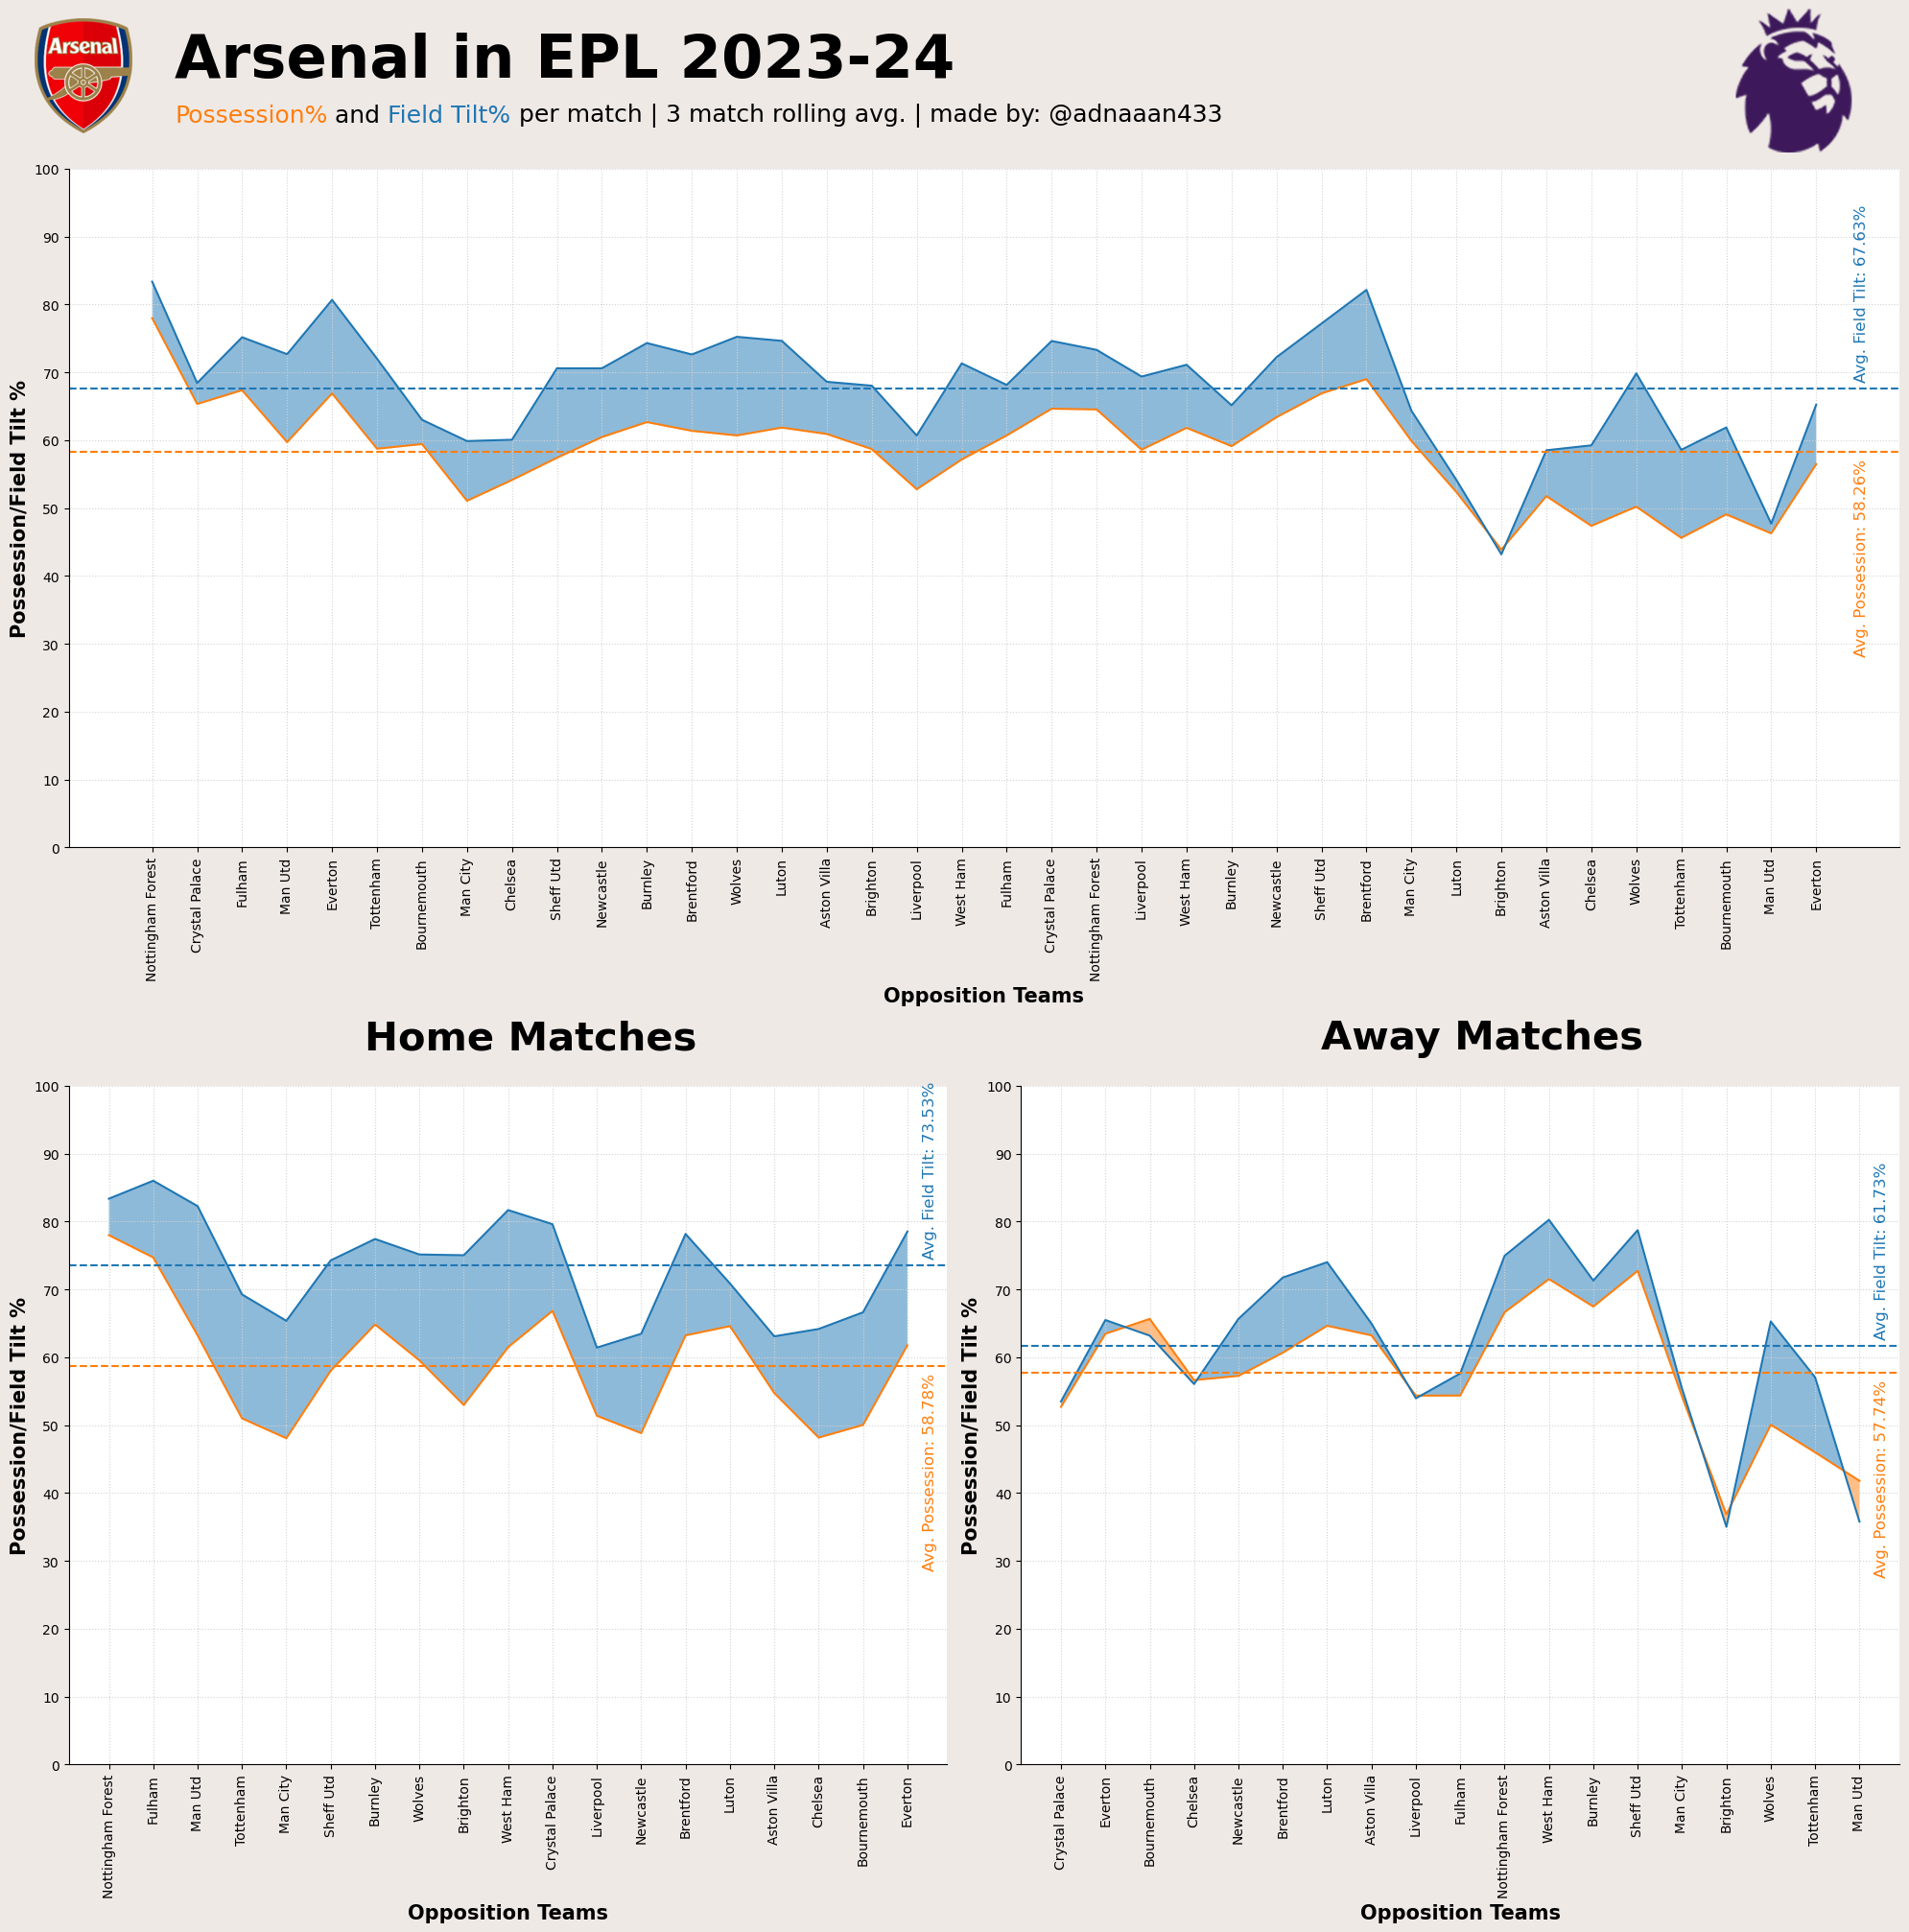

In [94]:
team_name = 'Arsenal'
# Create a figure
fig = plt.figure(figsize=(20, 20), facecolor='#EFE9E6')
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# Add the first plot to the first row, spanning two columns
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Plot something in each subplot
full_season(ax1, team_name)
home_matches(ax2, team_name)
away_matches(ax3, team_name)

# Adjust layout
plt.tight_layout()

himage = urlopen(f"file:///D:/FData/Leagues_logos/EPL_Logo.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.9, bottom=0.93, width=0.075, height=0.075)

himage = urlopen(f"file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.016, bottom=0.94, width=0.06, height=0.06)